In [21]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import seaborn as sns
from math import pow

In [22]:
df = pd.read_csv('Obesity prediction.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [23]:
df['IMT'] = df['Weight'] / df['Height'] ** 2
df = df.drop(['Weight','Height'], axis = 1)
df.head()

,Gender,Age,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,IMT
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [24]:
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoral = df.select_dtypes(include='object').columns.tolist()
categoral.remove('Obesity')
print(f' Numerical list : {numerical}')
print(f'Categorial list : {categoral}')

 Numerical list : ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMT']
Categorial list : ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


y = LabelEncoder().fit_transform(df['Obesity'])
X = df.drop('Obesity', axis = 1)

pre_procc = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(), categoral),
        ('num', StandardScaler(), numerical),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.15)

# Обучение моделей

In [26]:
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoral = df.select_dtypes(include='object').columns.tolist()
numerical.remove('Age')
categoral.remove('Obesity')
print(f' Numerical list : {numerical}')
print(f'Categorial list : {categoral}')

feature = numerical + categoral
y = LabelEncoder().fit_transform(df['Obesity'])
X = df[feature]

pre_procc = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(), categoral),
        ('num', StandardScaler(), numerical),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.15)

 Numerical list : ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMT']
Categorial list : ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


## Обучение Random Forest Classifier


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier



model = Pipeline([
    ('Preprocessing', pre_procc),
    ('PCA',PCA(n_components=2)),
    ('Classifier', RandomForestClassifier(random_state=42))
])
model.fit(X_train,y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier', RandomForestClassifier(random_state=42))])

In [28]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average='micro'))

0.444794952681388


In [29]:
model.named_steps.PCA.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {

    'PCA__n_components': [2],

    'Classifier__n_estimators': [100],

    'Classifier__max_depth': [None],

    'Classifier__min_samples_split': [2],

    'Classifier__min_samples_leaf': [1],

    'Classifier__max_features': ['sqrt'],

    'Classifier__bootstrap': [True],

    'Classifier__class_weight': ['balanced']
    
}

# Поиск по сетке
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
    )

grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Best parameter (CV score={grid_search.best_score_:.5f}):")
print("Лучшие параметры:", grid_search.best_params_)

Best parameter (CV score=nan):
Лучшие параметры: {'Classifier__bootstrap': True, 'Classifier__class_weight': 'balanced', 'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 100, 'PCA__n_components': 2}


In [31]:
import joblib as jl
jl.dump(grid_search, 'grid_search.pkl')

['grid_search.pkl']

## 1. Accuracy (Точность)

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.44


## 2. Confusion Matrix (Матрица ошибок)

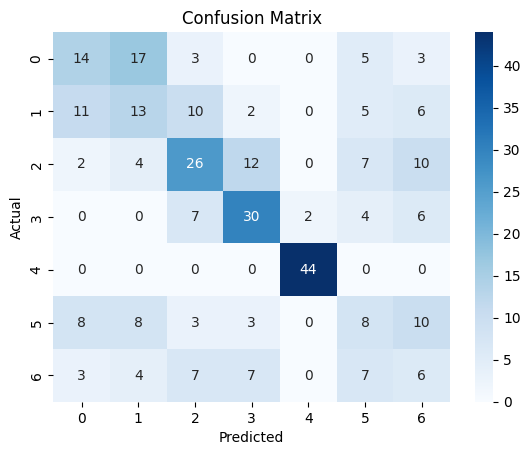

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3. Classification Report (Отчет о классификации)

In [34]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.33      0.35        42
           1       0.28      0.28      0.28        47
           2       0.46      0.43      0.44        61
           3       0.56      0.61      0.58        49
           4       0.96      1.00      0.98        44
           5       0.22      0.20      0.21        40
           6       0.15      0.18      0.16        34

    accuracy                           0.44       317
   macro avg       0.43      0.43      0.43       317
weighted avg       0.44      0.44      0.44       317



## 4. Средние метрики

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Micro-average
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Macro-average
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

# Weighted-average
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Micro Precision: {precision_micro:.2f}, Recall: {recall_micro:.2f}, F1: {f1_micro:.2f}")
print(f"Macro Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1: {f1_macro:.2f}")
print(f"Weighted Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1: {f1_weighted:.2f}")

Micro Precision: 0.44, Recall: 0.44, F1: 0.44
Macro Precision: 0.43, Recall: 0.43, F1: 0.43
Weighted Precision: 0.44, Recall: 0.44, F1: 0.44


## 5. ROC-AUC для многоклассовой классификации

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Бинаризация меток
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test)

# ROC-AUC для каждого класса
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC (Random Forest Classifier): {roc_auc:.2f}")

ROC-AUC (Random Forest Classifier): 0.82


## ROC-AUC кривая

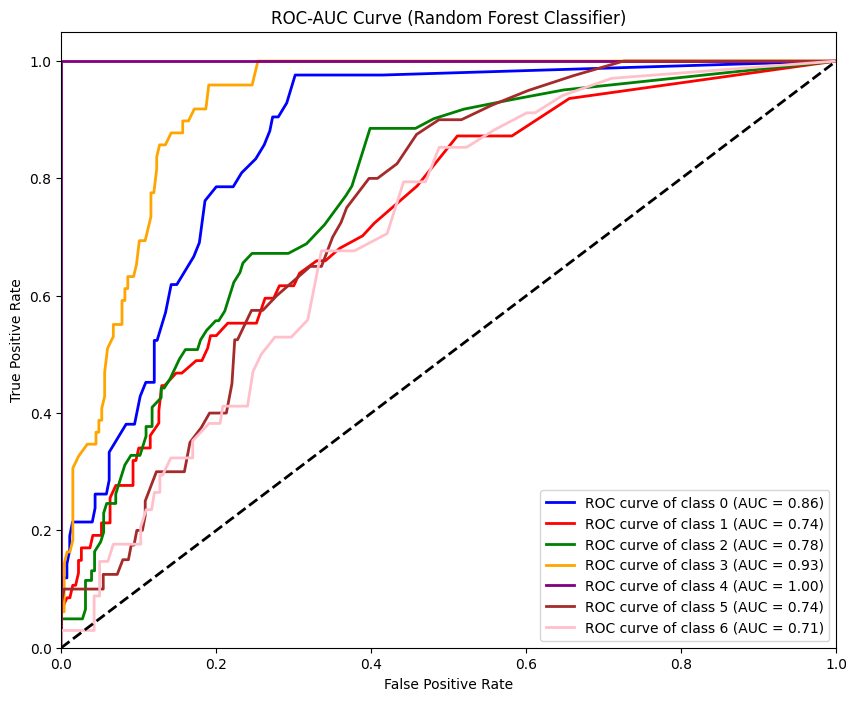

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Бинаризация меток
y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]

# Получение предсказанных вероятностей
y_pred_proba = model.predict_proba(X_test)

# Настройка стиля графиков
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])

# Построение ROC-кривой для каждого класса
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'ROC curve of class {i} (AUC = {roc_auc:.2f})')

# Настройка графика
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall кривая

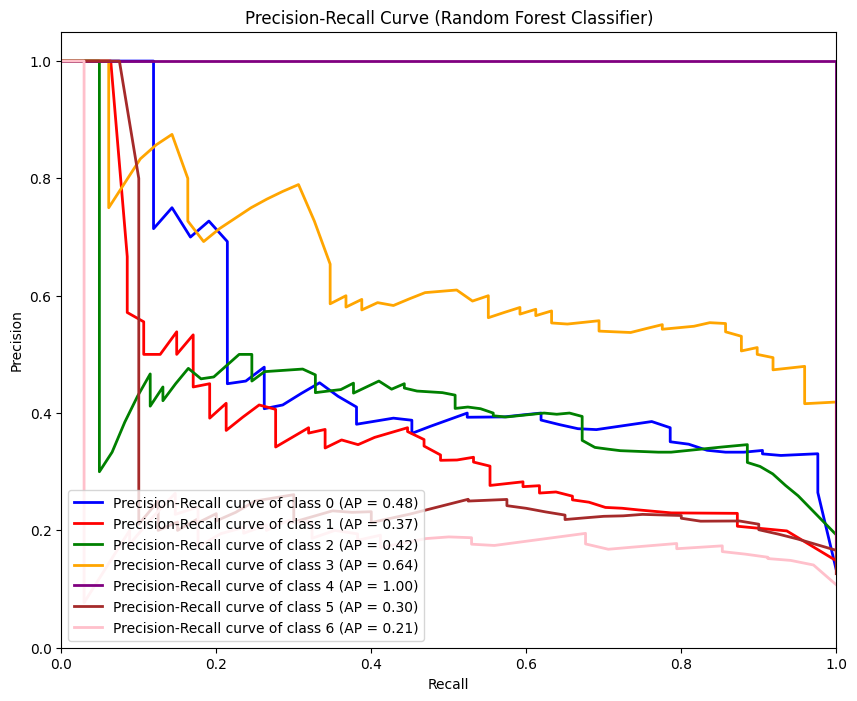

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Настройка стиля графиков
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])

# Построение Precision-Recall кривой для каждого класса
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Precision-Recall curve of class {i} (AP = {avg_precision:.2f})')

# Настройка графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest Classifier)')
plt.legend(loc="lower left")
plt.show()

## 6. Кросс-валидация

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (± {scores.std():.2f})")

Cross-Validation Accuracy: nan (± nan)


## 7. Важность признаков

In [40]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

### 1. Анализ распределения данных

In [ ]:
import pandas as pd

# Пример анализа данных
print(X['Gender'].value_counts())  # Распределение по полу
print(X['Age'].describe())         # Описательная статистика возраста
print(pd.crosstab(X['Gender'], y))  # Корреляция пола с целевой переменной

Gender
Male      1068
Female    1043
Name: count, dtype: int64
count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64
col_0     0    1    2    3    4    5    6
Gender                                   
Female  173  141  156    2  323  145  103
Male     99  146  195  295    1  145  187


### 2. Балансировка данных

## Обучение Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = Pipeline(
    [
        ('pre_procc', pre_procc),
        ('PCA', PCA(n_components=2)),
        ('Classifier', LogisticRegression(C=1.0, penalty='l2'))
    ]
)
model_logistic.fit(X_train, y_train)

Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier', LogisticRegression())])

In [ ]:
log_pred = model_logistic.predict(X_test)

print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=log_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=log_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=log_pred, average="weighted"):.4f}')


F1_score для micro: 0.4322
F1_score для macro: 0.4183
F1_score для weighted: 0.4223


In [ ]:
model_logistic.named_steps.Classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Обучение Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline(
    [
        ('pre_procc', pre_procc),
        ('PCA', PCA(n_components=2)),
        ('Classifier', KNeighborsClassifier(n_neighbors=5)) 
    ]
)
knn.fit(X_train, y_train)

Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier', KNeighborsClassifier())])

In [ ]:
knn_pred = knn.predict(X_test)

print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=knn_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=knn_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=knn_pred, average="weighted"):.4f}')

F1_score для micro: 0.4637
F1_score для macro: 0.4428
F1_score для weighted: 0.4514


In [ ]:
knn.named_steps.Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## All vs All

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


all_vs_all = Pipeline(
    [
    ('pre_procc', pre_procc),
    ('PCA', PCA(n_components=2)),
    ('Classifier', OneVsOneClassifier(SGDClassifier(loss='log_loss')) )
    ]
    )
all_vs_all.fit(X_train, y_train)


Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier',
                 OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [ ]:
all_vs_all_pred = all_vs_all.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="weighted"):.4f}')

F1_score для micro: 0.3880
F1_score для macro: 0.3859
F1_score для weighted: 0.3872


## One va All

In [99]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


all_vs_rest = Pipeline(
    [
    ('pre_procc', pre_procc),
    ('PCA', PCA(n_components=2)),
    ('Classifier', OneVsRestClassifier(SGDClassifier(loss='log_loss')) )
    ]
    )
all_vs_rest.fit(X_train, y_train)

Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier',
                 OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [100]:
all_vs_rest_pred = all_vs_all.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=all_vs_rest_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=all_vs_rest_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=all_vs_rest_pred, average="weighted"):.4f}')

ValueError: columns are missing: {'Age'}

## Обучение Random Forest Classifier


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier



model = Pipeline([
    ('Preprocessing', pre_procc),
    ('PCA',PCA(n_components=2)),
    ('Classifier', RandomForestClassifier(random_state=42))
])
model.fit(X_train,y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier', RandomForestClassifier(random_state=42))])

In [38]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average='micro'))

0.416403785488959


In [39]:
model.named_steps.PCA.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {

    'PCA__n_components': [2],

    'Classifier__n_estimators': [100],

    'Classifier__max_depth': [None],

    'Classifier__min_samples_split': [2],

    'Classifier__min_samples_leaf': [1],

    'Classifier__max_features': ['sqrt'],

    'Classifier__bootstrap': [True],

    'Classifier__class_weight': ['balanced']
    
}

# Поиск по сетке
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
    )

grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Best parameter (CV score={grid_search.best_score_:.5f}):")
print("Лучшие параметры:", grid_search.best_params_)

Best parameter (CV score=nan):
Лучшие параметры: {'Classifier__bootstrap': True, 'Classifier__class_weight': 'balanced', 'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 100, 'PCA__n_components': 2}


In [41]:
import joblib as jl
jl.dump(grid_search, 'grid_search.pkl')

['grid_search.pkl']

## 1. Accuracy (Точность)

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.42


## 2. Confusion Matrix (Матрица ошибок)

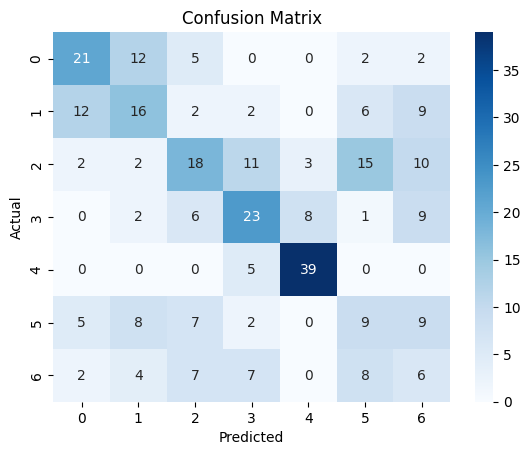

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3. Classification Report (Отчет о классификации)

In [44]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        42
           1       0.36      0.34      0.35        47
           2       0.40      0.30      0.34        61
           3       0.46      0.47      0.46        49
           4       0.78      0.89      0.83        44
           5       0.22      0.23      0.22        40
           6       0.13      0.18      0.15        34

    accuracy                           0.42       317
   macro avg       0.41      0.41      0.41       317
weighted avg       0.42      0.42      0.42       317



## 4. Средние метрики

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Micro-average
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Macro-average
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

# Weighted-average
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Micro Precision: {precision_micro:.2f}, Recall: {recall_micro:.2f}, F1: {f1_micro:.2f}")
print(f"Macro Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1: {f1_macro:.2f}")
print(f"Weighted Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1: {f1_weighted:.2f}")

Micro Precision: 0.42, Recall: 0.42, F1: 0.42
Macro Precision: 0.41, Recall: 0.41, F1: 0.41
Weighted Precision: 0.42, Recall: 0.42, F1: 0.42


## 5. ROC-AUC для многоклассовой классификации

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Бинаризация меток
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test)

# ROC-AUC для каждого класса
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC (Random Forest Classifier): {roc_auc:.2f}")

ROC-AUC (Random Forest Classifier): 0.82


## ROC-AUC кривая

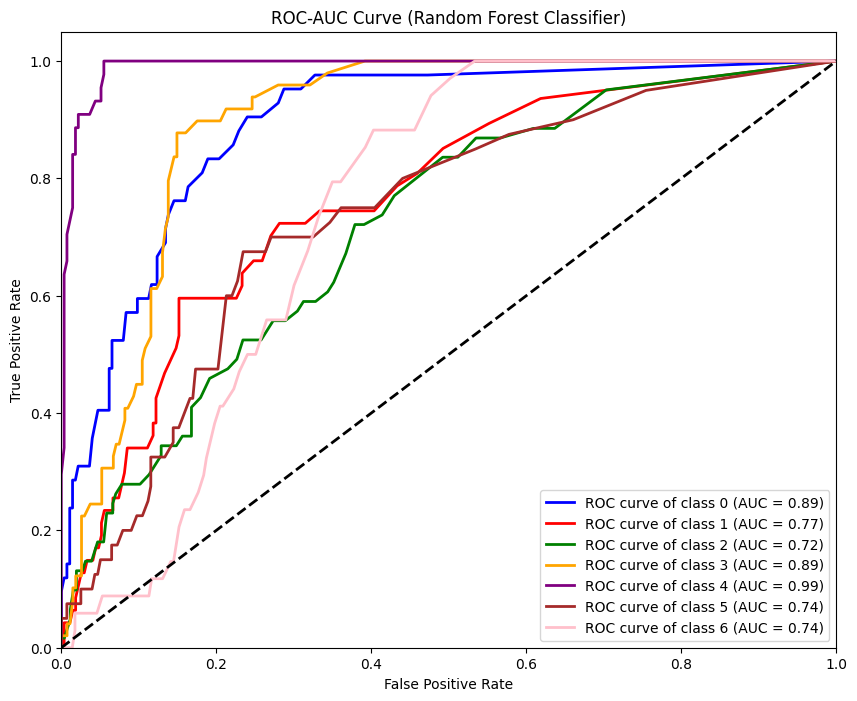

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Бинаризация меток
y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]

# Получение предсказанных вероятностей
y_pred_proba = model.predict_proba(X_test)

# Настройка стиля графиков
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])

# Построение ROC-кривой для каждого класса
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'ROC curve of class {i} (AUC = {roc_auc:.2f})')

# Настройка графика
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall кривая

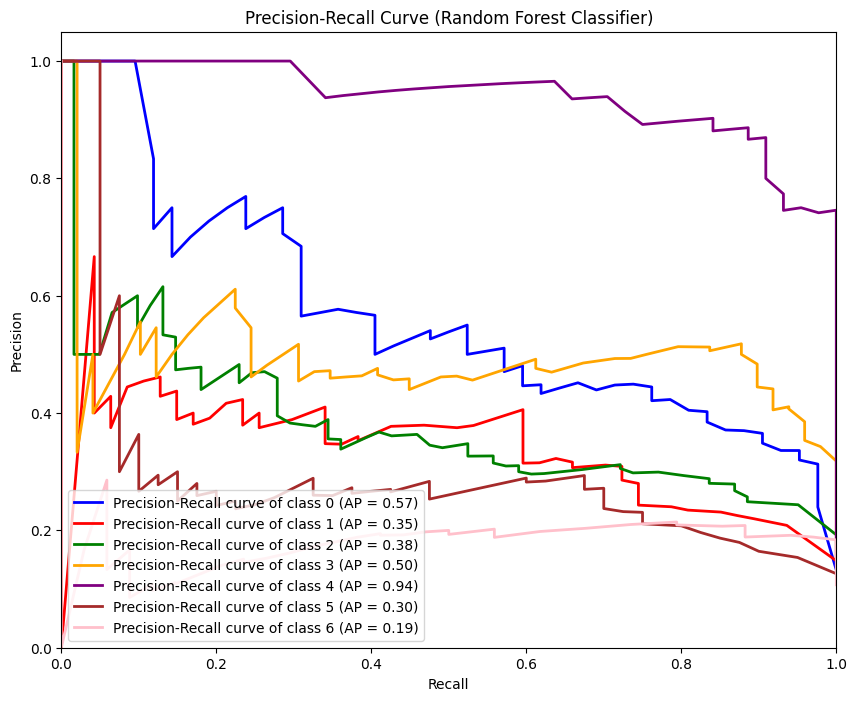

In [48]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Настройка стиля графиков
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])

# Построение Precision-Recall кривой для каждого класса
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Precision-Recall curve of class {i} (AP = {avg_precision:.2f})')

# Настройка графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest Classifier)')
plt.legend(loc="lower left")
plt.show()

## 6. Кросс-валидация

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (± {scores.std():.2f})")

Cross-Validation Accuracy: nan (± nan)


## 7. Важность признаков

In [50]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

### 1. Анализ распределения данных

In [36]:
import pandas as pd

# Пример анализа данных
print(X['Gender'].value_counts())  # Распределение по полу
print(X['Age'].describe())         # Описательная статистика возраста
print(pd.crosstab(X['Gender'], y))  # Корреляция пола с целевой переменной

Gender
Male      1068
Female    1043
Name: count, dtype: int64
count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64
col_0     0    1    2    3    4    5    6
Gender                                   
Female  173  141  156    2  323  145  103
Male     99  146  195  295    1  145  187


### 2. Балансировка данных

## Обучение Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
model_logistic = Pipeline(
    [
        ('pre_procc', pre_procc),
        ('PCA', PCA(n_components=2)),
        ('Classifier', LogisticRegression(C=1.0, penalty='l2'))
    ]
)
model_logistic.fit(X_train, y_train)

Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier', LogisticRegression())])

In [67]:
log_pred = model_logistic.predict(X_test)

print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=log_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=log_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=log_pred, average="weighted"):.4f}')


F1_score для micro: 0.4322
F1_score для macro: 0.4183
F1_score для weighted: 0.4223


In [62]:
model_logistic.named_steps.Classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Обучение Knn

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline(
    [
        ('pre_procc', pre_procc),
        ('PCA', PCA(n_components=2)),
        ('Classifier', KNeighborsClassifier(n_neighbors=5)) 
    ]
)
knn.fit(X_train, y_train)

Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier', KNeighborsClassifier())])

In [69]:
knn_pred = knn.predict(X_test)

print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=knn_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=knn_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=knn_pred, average="weighted"):.4f}')

F1_score для micro: 0.4637
F1_score для macro: 0.4428
F1_score для weighted: 0.4514


In [70]:
knn.named_steps.Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## All vs All

In [72]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


all_vs_all = Pipeline(
    [
    ('pre_procc', pre_procc),
    ('PCA', PCA(n_components=2)),
    ('Classifier', OneVsOneClassifier(SGDClassifier(loss='log_loss')) )
    ]
    )
all_vs_all.fit(X_train, y_train)


Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier',
                 OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [74]:
all_vs_all_pred = all_vs_all.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="weighted"):.4f}')

F1_score для micro: 0.3880
F1_score для macro: 0.3859
F1_score для weighted: 0.3872


## One va All

In [79]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


all_vs_rest = Pipeline(
    [
    ('pre_procc', pre_procc),
    ('PCA', PCA(n_components=2)),
    ('Classifier', OneVsRestClassifier(SGDClassifier(loss='log_loss')) )
    ]
    )
all_vs_rest.fit(X_train, y_train)

Pipeline(steps=[('pre_procc',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'IMT'])])),
                ('PCA', PCA(n_components=2)),
                ('Classifier',
                 OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [81]:
all_vs_rest_pred = all_vs_all.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=all_vs_rest_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=all_vs_rest_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=all_vs_rest_pred, average="weighted"):.4f}')

F1_score для micro: 0.3533
F1_score для macro: 0.3178
F1_score для weighted: 0.3178


In [26]:
from sklearn.svm import SVC
svc = Pipeline(
    [
        ('pre_procc', pre_procc),
        
        ("SVM", SVC(kernel='linear'))
    ]
)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=svc_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=svc_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=svc_pred, average="weighted"):.4f}')

F1_score для micro: 0.9527
F1_score для macro: 0.9512
F1_score для weighted: 0.9520


In [28]:
svc.named_steps.SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {


    'SVM__C': [0.1, 1, 10, 100],               # Параметр регуляризации
    'SVM__kernel': ['linear', 'rbf', 'poly'],  # Ядро
    'SVM__degree': [2, 3, 4],                  # Степень полинома (только для полиномиального ядра)
    'SVM__gamma': ['scale', 'auto', 0.01, 0.1], # Параметр gamma (только для RBF и полиномиального ядра)
    'SVM__class_weight': [None, 'balanced'],   # Веса классов
    'SVM__shrinking': [True, False],           # Использование метода усечения
    'SVM__probability': [True, False],         # Использование вероятностных предсказаний
    'SVM__tol': [1e-3, 1e-4],
    
}

# Поиск по сетке
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
    )

grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Best parameter (CV score={grid_search.best_score_:.5f}):")
print("Лучшие параметры:", grid_search.best_params_)

Best parameter (CV score=nan):
Лучшие параметры: {'SVM__C': 0.1, 'SVM__class_weight': None, 'SVM__degree': 2, 'SVM__gamma': 'scale', 'SVM__kernel': 'linear', 'SVM__probability': True, 'SVM__shrinking': True, 'SVM__tol': 0.001}


In [1]:
print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

NameError: name 'grid_search' is not defined

In [32]:
import joblib
joblib.dump(grid_search,'grid_search.pkl')

['grid_search.pkl']